<a href="https://colab.research.google.com/github/amolprabhu/Customer-Segmentation/blob/main/Capstone_Project_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
data = pd.read_excel('/content/drive/MyDrive/Amol Prabhu - Capstone Project - Customer Segmentation/Online Retail.xlsx')

In [3]:
# First 5 rows of the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Statistical description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##1. Data Cleaning

### In this step, the main focus will be to handle the null values and other errors in the data. Columns that are not required will also be dropped.

In [6]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Null values of the Description column

In [7]:
# Number of unique products in the dataset
data['Description'].nunique()

4223

There are 1454 null values in the description column. There are 4223 different products in the dataset. It is not possible to fill the null values in a strategical manner. Hence, we will drop the null values of the description column.

In [8]:
# Dropping the null values of the description column
data.dropna(subset = ['Description'], inplace = True)

## Null values of the Customer ID column

### As customer ID is a 5 digit number, we can convert it from a float type to an integer type.

In [56]:
# Converting Customer ID column from float type to int type
data['CustomerID'] = data['CustomerID'].apply(int)

In [9]:
# Sum of null values in the dataset
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [57]:
# Number of unique Customer IDs
data['CustomerID'].nunique()

4192

There are 4372 unique customers in the dataset, there are also 133626 null values in the column. There is no particular method to fill these huge number of points. We cannot use median, mean or mode to fill these values. It is close to impossible that one customer ID can fill 133626 rows. Hence, we will drop the rows containing null values.

In [11]:
# Dropping the rows which contain null values in the Customer ID column
data.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [12]:
# Re-checking null values after removal
print(data.isna().sum())
print(f'The shape of the data is {data.shape}')

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
The shape of the data is (406829, 8)


### The null values have been succesfully removed, unfortunately more than 100000 rows have been lost in the process.

### It is known that some of the orders have been cancelled, the invoice numbers of these orders start with a 'C'. The cancelled orders are also removed.

In [13]:
# Converting the column to a string type to detect 'C'
data['InvoiceNo'] = data['InvoiceNo'].apply(str)

In [14]:
# Creating a function to detect cancelled orders
def cancelled_order(rows):
  '''Detects cancelled orders and returns YES or NO accordingly'''
  if 'C' in rows:
    return 'YES'
  else:
    return 'NO'

In [15]:
# Applying the above function and creating a new column to display cancelled orders
data['Cancelled'] = data['InvoiceNo'].apply(cancelled_order)

In [16]:
# Dropping the cancelled orders
data.drop(data[data['Cancelled'] == 'YES'].index, inplace=True)

In [17]:
# Dropping the cancelled column
data.drop('Cancelled', axis = 1, inplace = True)

In [18]:
# Converting the Invoice no column back to a numerical type
data['InvoiceNo'] = data['InvoiceNo'].apply(int)

### Stock code and Item description represent the same thing, but item description describes it more clearly. Hence, we can drop the stock code.

In [19]:
# Dropping Stock Code column
data.drop('StockCode', axis = 1, inplace = True)

### Using the invoice date column, elements such as day month and year are extracted. This will help in the EDA process.

In [20]:
# Using the Invoice date column to extract 
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

### The time part of the column is not used because, time of the day does not influence the orders to a large extent.

### After extraction of the day, month and year. The invoice date column will be dropped.

In [21]:
# Dropping the invoice date column
data.drop('InvoiceDate', axis = 1, inplace = True)

In [22]:
# Brief Description of the data
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.042181,7.612537,2010.934259
std,13106.167695,180.420210,22.096788,1713.169877,8.653771,3.416527,0.247829
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000
25%,549234.000000,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


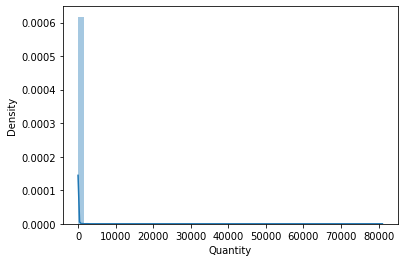

In [23]:
# Distribution of the Quantity column
sns.distplot(data['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


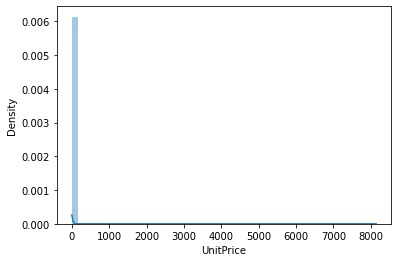

In [24]:
# Distribution of the Unit Price column
sns.distplot(data['UnitPrice'])

### From the description and distribution plots above, it is seen that outliers do exist.

In [25]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]   
  
  return df

In [26]:
# Removing the outliers using the function created
data = remove_outliers(df = data, column = 'Quantity')
data = remove_outliers(df = data, column = 'UnitPrice')

### In the data cleaning procedure 

*   Null Values were removed
*   Cancelled orders were removed
*   Invoice Date column was split to form seperate date, month and year columns
*   Outliers were removed
*   Columns such as invoice date, stock code have been removed



## 2. Exploratory Data Analysis (EDA)

### In this section, different columns will be explored individually and also as a combination of different columns.

### Univariate Analysis

### Distribution of Quantity

Text(0.5, 1.0, 'Quantity sold')

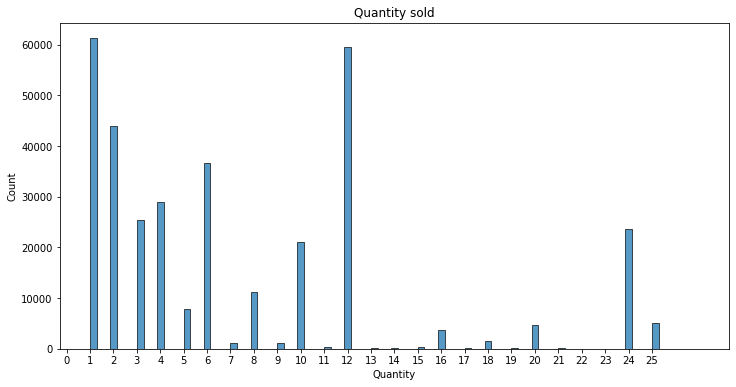

In [111]:
# Distribution of the quantity column
plt.figure(figsize = (12,6))
sns.histplot(data['Quantity'])
plt.xticks(np.arange(0,26))
plt.title('Quantity sold')

### From the histogram plotted for quantity, it is seen that, 12 units and single units are highly sold. Units of less than 12 are sold more than units exceeding 12.



### Top 10 most repeatedly sold items

In [48]:
# Top 10 most repeatedly sold items
data['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1680
JUMBO BAG RED RETROSPOT               1329
PARTY BUNTING                         1275
LUNCH BAG RED RETROSPOT               1207
ASSORTED COLOUR BIRD ORNAMENT         1159
SET OF 3 CAKE TINS PANTRY DESIGN      1120
LUNCH BAG  BLACK SKULL.               1048
SPOTTY BUNTING                         976
LUNCH BAG SPACEBOY DESIGN              971
PACK OF 72 RETROSPOT CAKE CASES        963
Name: Description, dtype: int64

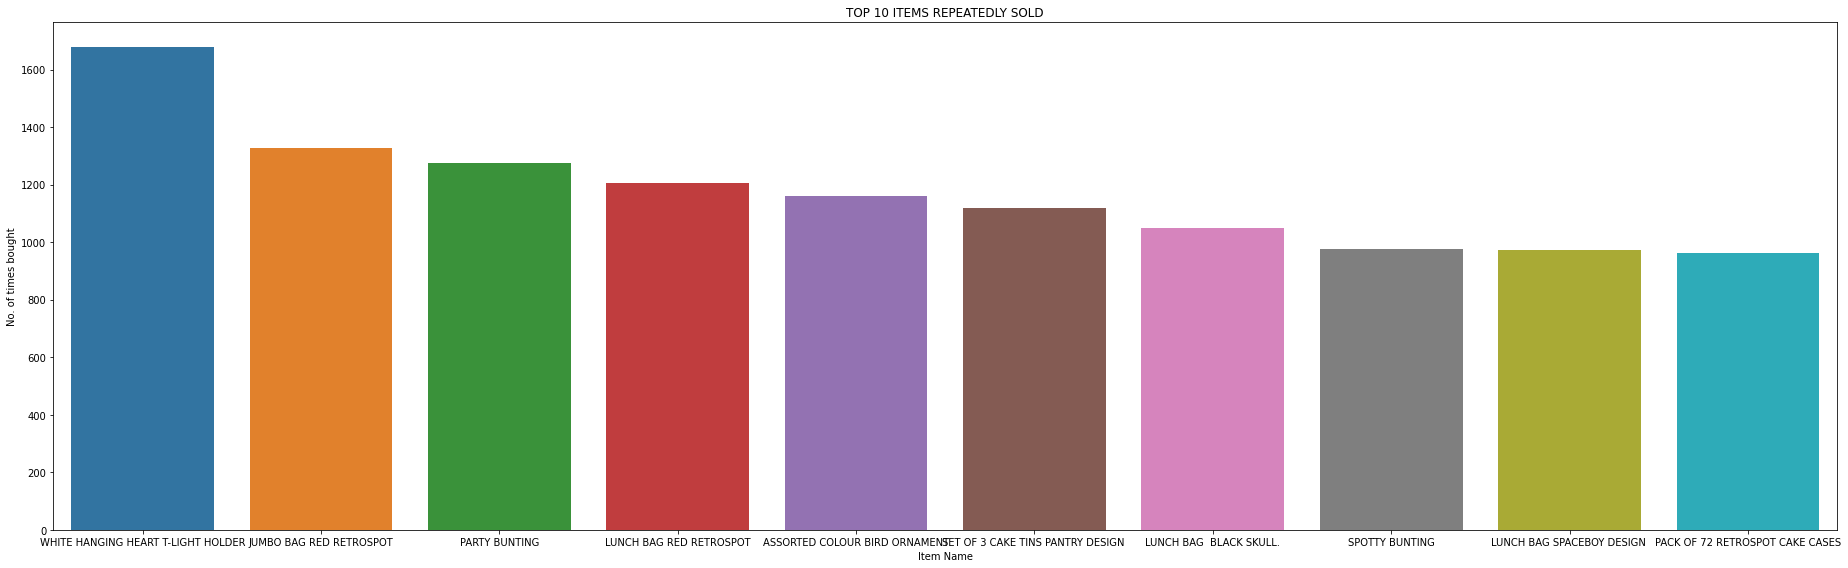

In [112]:
# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize = (26,8))
sns.barplot(x = data['Description'].value_counts()[:10].index, y = data['Description'].value_counts()[:10].values)
plt.xlabel('Item Name')
plt.ylabel('No. of times bought')
plt.title('TOP 10 ITEMS REPEATEDLY SOLD')
plt.tight_layout()

### Distribution of the Unit Price

Text(0.5, 1.0, 'UNIT PRICE DISTRIBUTION')

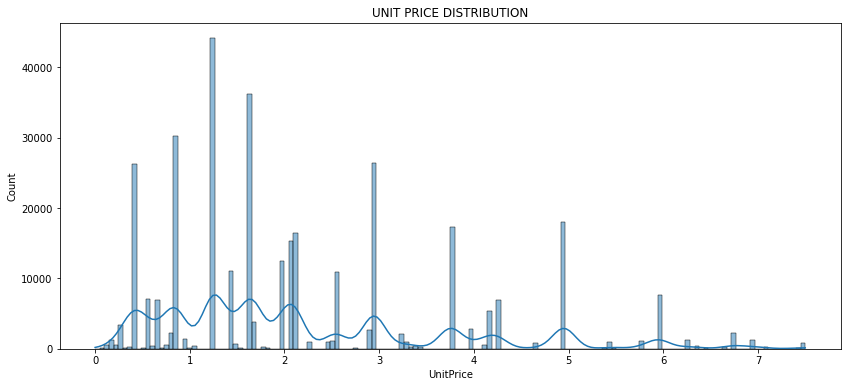

In [113]:
# Distribution of unit price
plt.figure(figsize = (14,6))
sns.histplot(data['UnitPrice'], kde=True)
plt.title('UNIT PRICE DISTRIBUTION')

### From the distribution of unit price, it is understood that most items have a lower price range. There are comparatively fewer products with higher unit prices than products with lower unit prices.

### Customer who purchased most number of times

Text(0.5, 1.0, 'TOP 10 REPEATED CUSTOMER ID')

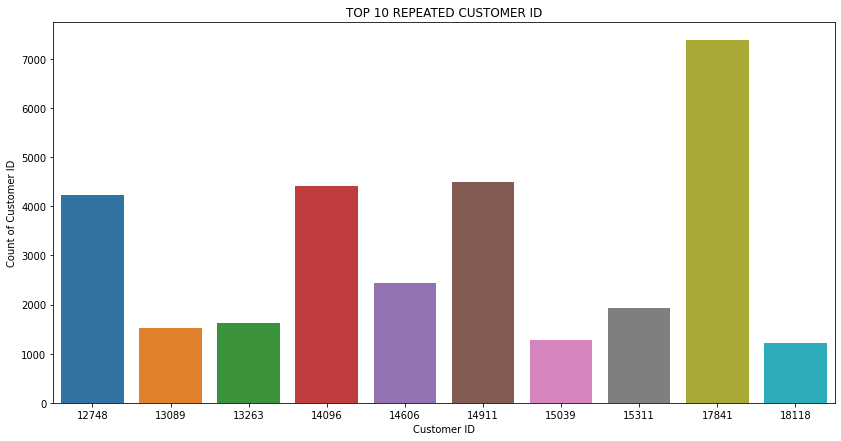

In [114]:
# Top 10 repeated customer ID
plt.figure(figsize = (14,7))
sns.barplot(x = data['CustomerID'].value_counts()[:10].index , y = data['CustomerID'].value_counts()[:10].values)
plt.xlabel('Customer ID')
plt.ylabel('Count of Customer ID')
plt.title('TOP 10 REPEATED CUSTOMER ID')

### As seen from the barplot of the customer ID column, customer with the ID 17841 has highest number of counts, which indicates that they purchased many different items.

### Countries that were sold different items the most

Text(0.5, 1.0, 'TOP 10 COUNTRIES SOLD TO')

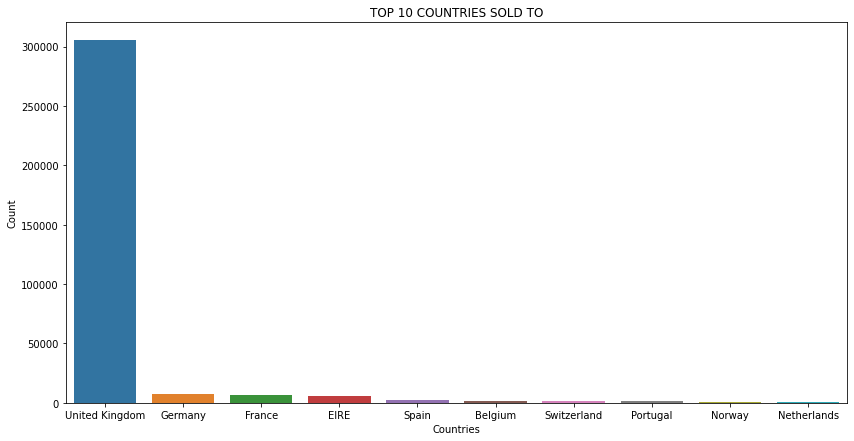

In [115]:
# Top 10 countries that were sold different items
plt.figure(figsize = (14,7))
sns.barplot(x = data['Country'].value_counts()[:10].index, y = data['Country'].value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('TOP 10 COUNTRIES SOLD TO')

### From the barplot for purchases by countries, it is clearly seen that United Kingdom dominates the purchases compared to other countries. All the top 10 countries are a part of Europe, itself.

### Monthly purchaces

Text(0.5, 1.0, 'MONTHLY PURCHASES')

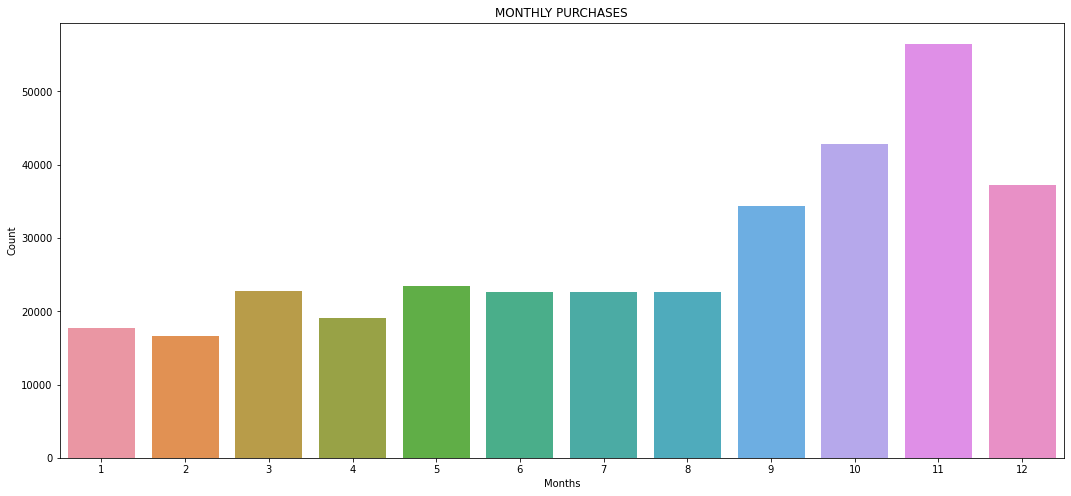

In [116]:
# Monthly purchases
plt.figure(figsize = (18,8))
sns.barplot(x = data['Month'].value_counts().index, y = data['Month'].value_counts().values)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('MONTHLY PURCHASES')

### From the plot for monthly purchases it is seen that most of the purchases, occur in the month of November, followed by October and December.

### Bivariate Analysis

### Invoices with highest number of items

In [86]:
# Invoices with most number of items
inv_quantity_10 = data.groupby('InvoiceNo').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'INVOICE NUMBER AND SUM OF QUANTITIES')

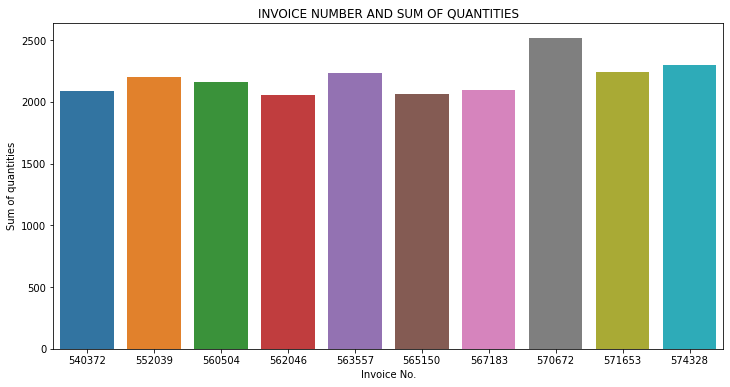

In [117]:
# Barplot for invoices with most number of items
plt.figure(figsize = (12,6))
sns.barplot(x = inv_quantity_10.index, y = inv_quantity_10.values)
plt.xlabel('Invoice No.')
plt.ylabel('Sum of quantities')
plt.title('INVOICE NUMBER AND SUM OF QUANTITIES')

### Invoice No. 570672 has the most number of items in it.

### Customer ID in terms of quantities purchased

In [90]:
# Top 10 Customer Id in terms of quantities purchased
customer_quantity_10 = data.groupby('CustomerID').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'CUSTOMER ID AND SUM OF QUANTITY')

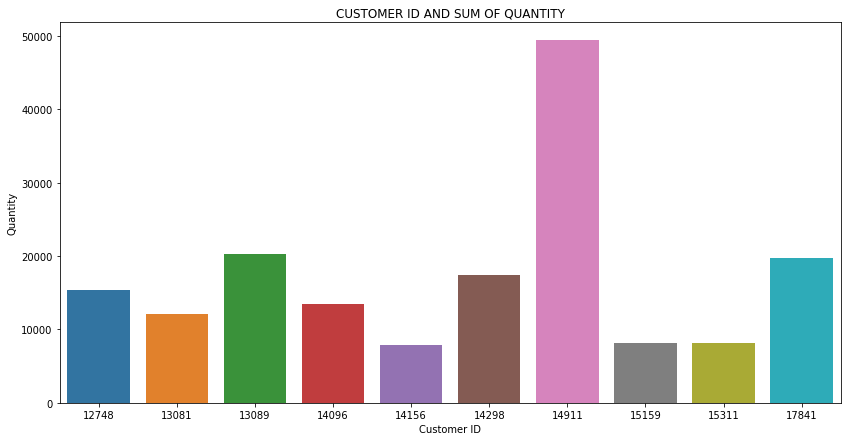

In [118]:
# Barplot for top 10 customers who purchased in high quantity
plt.figure(figsize = (14,7))
sns.barplot(x = customer_quantity_10.index, y = customer_quantity_10.values)
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('CUSTOMER ID AND SUM OF QUANTITY')

### Customer with the ID 14911 purchases in large number significantly more than other customers. This customer could be vital to the business.

### Items sold in terms of quantites

In [98]:
# Top 10 items sold in terms of quantity
item_quantity_10 = data.groupby('Description').sum()['Quantity'].sort_values(ascending = False)[:10]

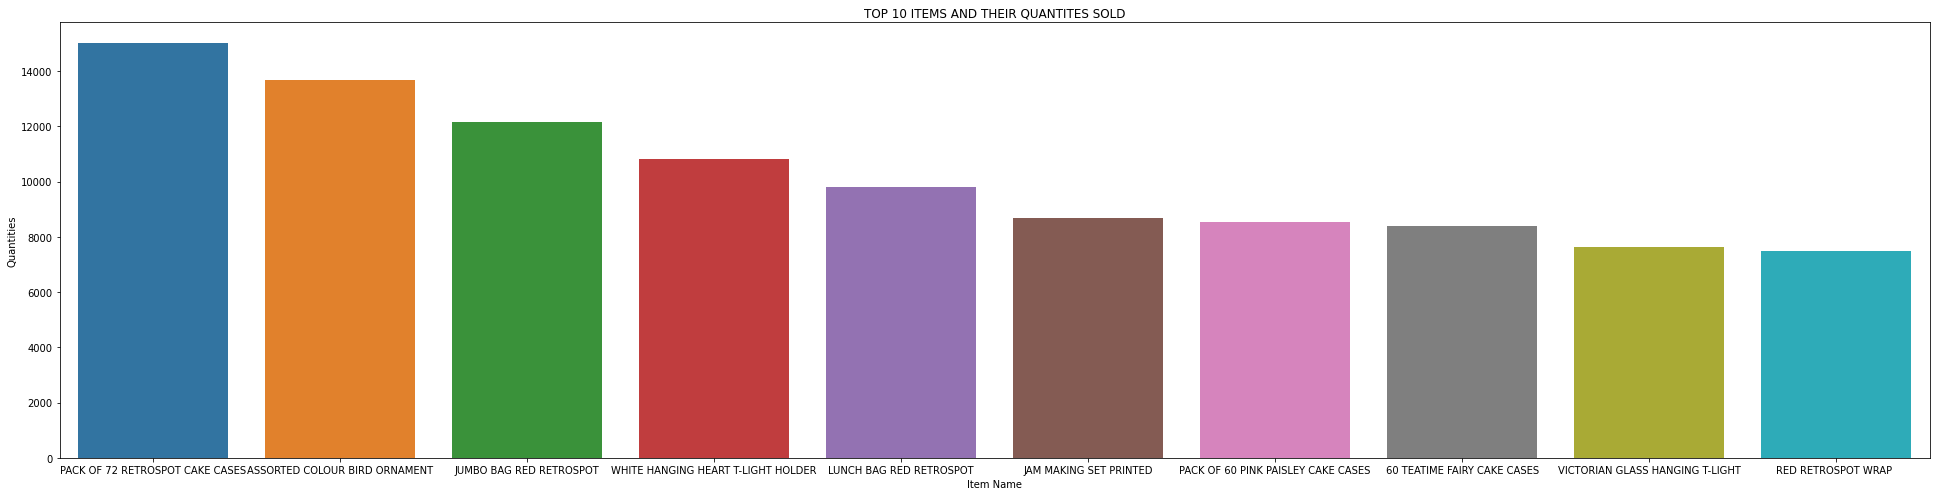

In [120]:
# Barplot of top 10 items sold in terms of quantity
plt.figure(figsize = (27,7))
sns.barplot(x = item_quantity_10.index, y = item_quantity_10.values)
plt.xlabel('Item Name')
plt.ylabel('Quantities')
plt.title('TOP 10 ITEMS AND THEIR QUANTITES SOLD')
plt.tight_layout()

### 'Pack of 72 retrospot cake cases' were highly sold in terms of quantites, around 15000 units.

In [28]:
data.head()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010
1,536365,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010


Text(0.5, 1.0, 'CORRELTAION MATRIX')

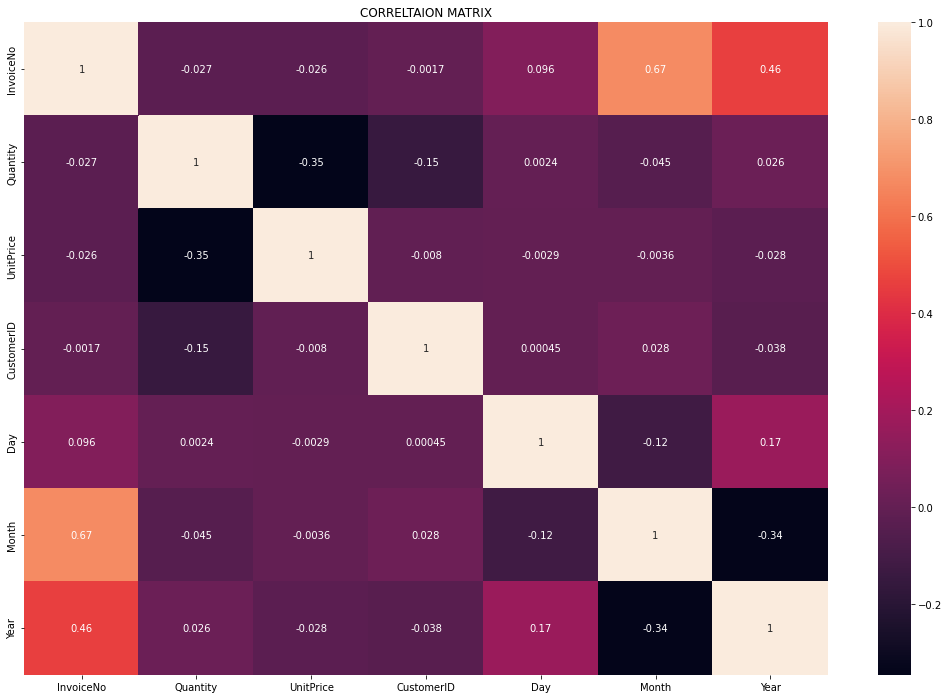

In [121]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

### From the correaltion matrix, it is understood that most columns are not correlated to each other. Except for month and year, they are highly correlated with the invoice number. Whereas month and year are negatively correlated.
